# Comparison of Regressors for Real Estate Valuation

In this assignment we have been given the task to create a Decision Tree Regressor and a Linear Regression Model , and compare the performance of the two, from the given dataset. Our main objective is to figure out what is the best algorithm for this dataset.

## *The dataset*



#### *What is the purpose of this dataset?*
The purpose of this dataset is to predict the price of houses based on given features.

#### *What are the features?*
The features or our input data is:

- When the house was bought 
- How old the house is  
- How far from the nearest MRT station
- The amount of convenience stores
- Latitude
- Longitude
- House price of unit area


In essence, we are mostly dealing with continous values. 

#### *What are the targets?*
Our target will be the actual price that our model is trying to learn how to predict.


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Removed unnecessary coloumns

In [110]:
dataset = pd.read_csv('realestate.csv', sep=",")
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('No', axis=1, inplace=True)
dataset.head(5)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


## Splitting and Sampling

### Splitting

In this scenario, our split will be 80/20 split. We are looking for precision and accuracy when we are dealing with price. The 80/20 split is not universal answer for all datasets, but since the dataset we will be working with is small (414 rows), the split should be optimal.

### Sampling

Since we are dealing with regressors, we dont need to have a validation. We can do a two set split with training set and test set. However, we are going to include cross validation to help understanding how our model will perform, and observing the R2 score.

In [112]:
features = dataset.drop('Y house price of unit area', axis=1)
targets = dataset['Y house price of unit area']

train_features, test_features, train_targets, test_targets = train_test_split(features,targets,test_size=0.2, random_state=42)

### Creating our Decision Tree Regressor


In [113]:
decision_tree_Regressor_model1 = DecisionTreeRegressor(min_samples_split=30 ,max_depth=10)
decision_tree_Regressor_model1.fit(train_features,train_targets)

DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [114]:
def evaluate(model):
    
    predictions_train = model.predict(train_features)
    predictions_test = model.predict(test_features)

    print(f"Train R2 score: {r2_score(train_targets, predictions_train)}")
    print(f"Train Mean Squared Error: {mean_squared_error(train_targets, predictions_train)}")
    print(f"Train Mean Absolute Error: {mean_absolute_error(train_targets, predictions_train)}")
    
    print()

    print(f"Test R2 score: {r2_score(test_targets, predictions_test)}")
    print(f"Test Mean Squared Error: {mean_squared_error(test_targets, predictions_test)}")
    print(f"Test Mean Absolute Error: {mean_absolute_error(test_targets, predictions_test)}\n")


    cv_scores = cross_val_score(model, features, targets, cv=5, scoring='r2')
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean cross-validation R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

### Creating our Linear Regressor

This model doesnt allow us to change any hyperparameters. So we will leave it as is. 

In [115]:
linear_Regression_model1 = LinearRegression()
linear_Regression_model1.fit(train_features, train_targets) 

LinearRegression()

In [116]:
print("DECISION TREE REGRESSOR:\n ")
evaluate(decision_tree_Regressor_model1)
print()
print("LINEAR REGRESSION MODEL:\n")
evaluate(linear_Regression_model1)

DECISION TREE REGRESSOR:
 
Train R2 score: 0.7900501476715861
Train Mean Squared Error: 39.48957321581573
Train Mean Absolute Error: 4.394722109045896

Test R2 score: 0.7404189617688817
Test Mean Squared Error: 43.547248655953574
Test Mean Absolute Error: 4.861022219342501

Cross-validation R2 scores: [0.74374867 0.32391492 0.73162231 0.52487774 0.18796051]
Mean cross-validation R2 score: 0.5024 (+/- 0.4400)

LINEAR REGRESSION MODEL:

Train R2 score: 0.5581330550666252
Train Mean Squared Error: 83.11097569290273
Train Mean Absolute Error: 6.339704852417023

Test R2 score: 0.6810781244679265
Test Mean Squared Error: 53.50225236117953
Test Mean Absolute Error: 5.3052329525851025

Cross-validation R2 scores: [0.71179668 0.51938519 0.66182298 0.43950453 0.59327027]
Mean cross-validation R2 score: 0.5852 (+/- 0.1950)


## Discussing the results

### The Decision Tree Regressor

- The Decision Tree Regressor shows decent performance on the training data with a 79% score on the $R^2$. In other words, 79% of the differences in price can be predicted by the available data.

### The Linear Regressor

### *Summary*

#### Added cross validation

## Conclusion

###  - * OPTIONAL SEGMENT ONLY FOR VISUALIZATION * - 

### FOLLOWING CODE WAS NOT WRITTEN BY ME, IT IS A WORK OF A LLM(Large Language Model)

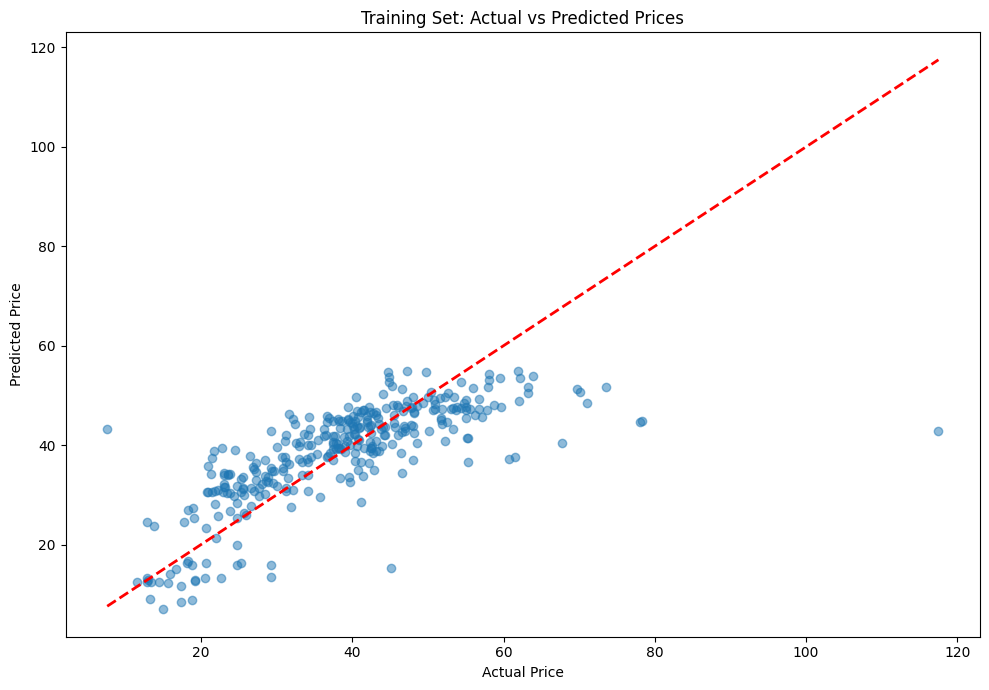

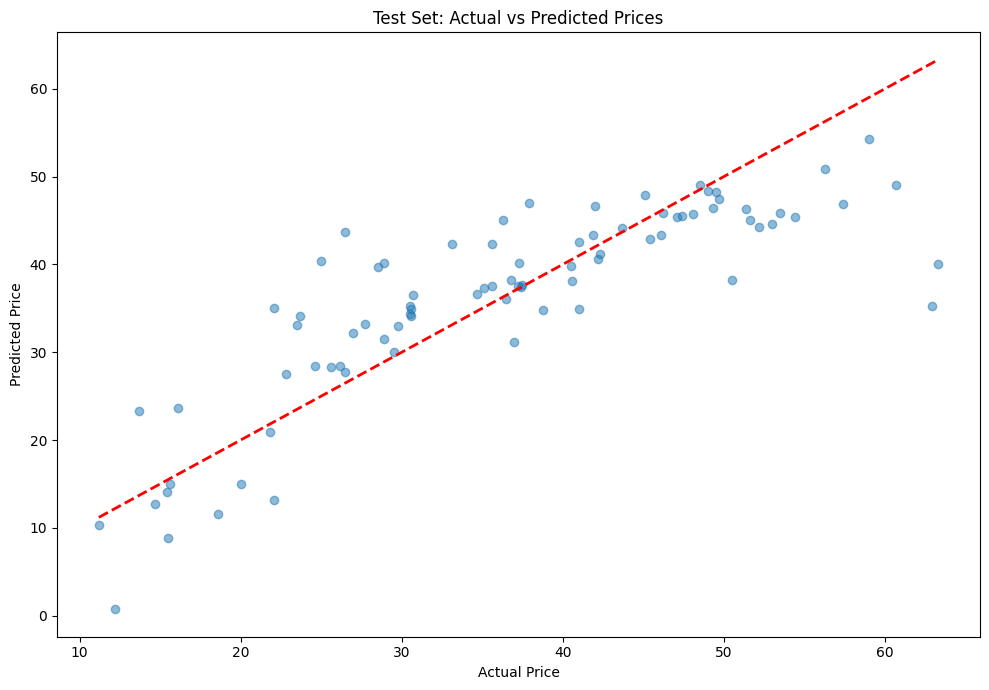

In [117]:

def plot_actual_vs_predicted(actual, predicted, set_name):
    plt.figure(figsize=(10, 7))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{set_name} Set: Actual vs Predicted Prices")
    plt.tight_layout()
    plt.show()

train_predictions = linear_Regression_model1.predict(train_features)
test_predictions = linear_Regression_model1.predict(test_features)

plot_actual_vs_predicted(train_targets, train_predictions, "Training")
plot_actual_vs_predicted(test_targets, test_predictions, "Test")
